# Applied Deep Learning - a use case based approach to understand deep neural networks

### Umberto Michelucci

Buy the book: https://www.apress.com/us/book/9781484237892

(C) Umberto Michelucci 2018-2019 - umberto.michelucci@gmail.com 

github repository: https://github.com/michelucci/applieddeeplearningbook

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
from random import shuffle

# Explanation of data preparation

In [3]:
 ['{0:04b}'.format(i) for i in range(2**4)]

['0000',
 '0001',
 '0010',
 '0011',
 '0100',
 '0101',
 '0110',
 '0111',
 '1000',
 '1001',
 '1010',
 '1011',
 '1100',
 '1101',
 '1110',
 '1111']

# Data preparation

In [5]:
nn = 15
ll = 2**15

In [6]:
train_input = ['{0:015b}'.format(i) for i in range(ll)]
shuffle(train_input)
train_input = [map(int,i) for i in train_input]
ti  = []
for i in train_input:
    temp_list = []
    for j in i:
            temp_list.append([j])
    ti.append(np.array(temp_list))
train_input = ti

In [7]:
np.asarray(train_input).shape

(32768, 15, 1)

In [8]:
train_output = []
 
for i in train_input:
    count = 0
    for j in i:
        if j[0] == 1:
            count+=1
    temp_list = ([0]*(nn+1))
    temp_list[count]=1
    train_output.append(temp_list)

In [9]:
np.asarray(train_output).shape

(32768, 16)

In [12]:
NUM_EXAMPLES = ll-2000
test_input = train_input[NUM_EXAMPLES:]
test_output = train_output[NUM_EXAMPLES:] #everything beyond 10,000
 
train_input = train_input[:NUM_EXAMPLES]
train_output = train_output[:NUM_EXAMPLES] #till 10,000

In [10]:
np.asarray(test_input).shape

(2000, 15, 1)

In [11]:
np.asarray(train_input).shape

(30768, 15, 1)

In [20]:
tf.reset_default_graph()

data = tf.placeholder(tf.float32, [None, nn,1])
target = tf.placeholder(tf.float32, [None, (nn+1)])

num_hidden = 24
cell = tf.nn.rnn_cell.LSTMCell(num_hidden,state_is_tuple=True)

val, state = tf.nn.dynamic_rnn(cell, data, dtype=tf.float32)
val = tf.transpose(val, [1, 0, 2])
last = tf.gather(val, int(val.get_shape()[0]) - 1)

weight = tf.Variable(tf.truncated_normal([num_hidden, int(target.get_shape()[1])]))
bias = tf.Variable(tf.constant(0.1, shape=[target.get_shape()[1]]))

prediction = tf.nn.softmax(tf.matmul(last, weight) + bias)

In [21]:
cross_entropy = -tf.reduce_sum(target * tf.log(tf.clip_by_value(prediction,1e-10,1.0)))

In [22]:
optimizer = tf.train.AdamOptimizer()
minimize = optimizer.minimize(cross_entropy)

C:\Users\umber\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\gradients_impl.py:96: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [23]:
mistakes = tf.not_equal(tf.argmax(target, 1), tf.argmax(prediction, 1))
error = tf.reduce_mean(tf.cast(mistakes, tf.float32))

In [24]:
init_op = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init_op)

In [25]:
len(train_input)

30768

In [26]:
batch_size = 1000
no_of_batches = int(len(train_input)/batch_size)
epoch = 100
for i in range(epoch):
    ptr = 0
    for j in range(no_of_batches):
        inp, out = train_input[ptr:ptr+batch_size], train_output[ptr:ptr+batch_size]
        ptr+=batch_size
        sess.run(minimize,{data: inp, target: out})
    if (i % 10 == 0):
        #print ("Epoch - ",str(i))
        incorrect = sess.run(error,{data: test_input, target: test_output})
        print('Epoch {:2d} error {:3.1f}%'.format(i , 100 * incorrect))
incorrect = sess.run(error,{data: test_input, target: test_output})
print('Epoch {:2d} error {:3.1f}%'.format(i + 1, 100 * incorrect))
#sess.close()

Epoch  0 error 79.1%
Epoch 10 error 33.3%
Epoch 20 error 9.4%
Epoch 30 error 4.1%
Epoch 40 error 2.5%
Epoch 50 error 1.6%
Epoch 60 error 1.7%
Epoch 70 error 1.6%
Epoch 80 error 1.3%
Epoch 90 error 0.7%
Epoch 100 error 0.5%


In [ ]:
print (sess.run(model.prediction,{data: [[[1],[0],[0],[1],[1],[0],[1],[1],[1],[0],[1],[0],[0],[1],[1],[0],[1],[1],[1],[0]]]}))

# Normal network

In [ ]:
n_dim = 20
tf.reset_default_graph()

# Number of neurons in the layers
n1 = 15 # Number of neurons in layer 1
n2 = 21 # Number of neurons in output layer 

cost_history = np.empty(shape=[1], dtype = float)
learning_rate = tf.placeholder(tf.float32, shape=())

X = tf.placeholder(tf.float32, [20, None])
Y = tf.placeholder(tf.float32, [21, None])
W1 = tf.Variable(tf.truncated_normal([n1, n_dim], stddev=.1)) 
b1 = tf.Variable(tf.constant(0.1, shape = [n1,1]) )
W2 = tf.Variable(tf.truncated_normal([n2, n1], stddev=.1)) 
b2 = tf.Variable(tf.constant(0.1, shape = [n2,1])) 
                 
# Let's build our network...
Z1 = tf.nn.relu(tf.matmul(W1, X) + b1) # n1 x n_dim * n_dim x n_obs = n1 x n_obs
Z2 = tf.matmul(W2, Z1) + b2 # n2 x n1 * n1 * n_obs = n2 x n_obs
y_ = tf.nn.softmax(Z2,0) # n2 x n_obs (10 x None)


prediction = tf.nn.softmax(y_)

cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

mistakes = tf.not_equal(tf.argmax(Y, 1), tf.argmax(prediction, 1))
error = tf.reduce_mean(tf.cast(mistakes, tf.float32))

init = tf.global_variables_initializer()

In [ ]:
train_size = 95000
test_size = 5000

sess = tf.Session()
sess.run(tf.global_variables_initializer())

training_epochs = 100
    
cost_history = []
for epoch in range(training_epochs+1):

    sess.run(optimizer, feed_dict = {X: np.asarray(train_input).reshape(20,95000), 
                                     Y: np.asarray(train_output).reshape(21,95000), learning_rate: .1})
    cost_ = sess.run(cost, feed_dict={ X:np.asarray(train_input).reshape(20,95000), 
                                      Y: np.asarray(train_output).reshape(21,95000), learning_rate: .1})
    cost_history = np.append(cost_history, cost_)
    
    if (epoch % 10 == 0):
        print("Reached epoch",epoch,"cost J =", cost_)
        incorrect = sess.run(error,{X: np.asarray(test_input).reshape(20,test_size), 
                                    Y: np.asarray(test_output).reshape(21,test_size)})
        print(100 * incorrect)

# CNN

In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [28]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [29]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


# Data Zalando

In [45]:
import pandas as pd

In [46]:
data_train = pd.read_csv('fashion-mnist_train.csv', header = 0)
data_test = pd.read_csv('fashion-mnist_test.csv', header = 0)

In [58]:
labels = data_train['label'].values.reshape(1, 60000)

labels_ = np.zeros((60000, 10))
labels_[np.arange(60000), labels] = 1
train = data_train.drop('label', axis=1)

labels_dev = data_test['label'].values.reshape(1, 10000)

labels_dev_ = np.zeros((10000, 10))
labels_dev_[np.arange(10000), labels_dev] = 1
dev = data_test.drop('label', axis=1)

In [59]:
print(labels_.shape)
print(labels_dev_.shape)

(60000, 10)
(10000, 10)


In [60]:
train = np.array(train / 255.0)
dev = np.array(dev / 255.0)
labels_ = np.array(labels_)
labels_test_ = np.array(labels_test_)

# Network

In [74]:
# Placeholder variable for the input images
x = tf.placeholder(tf.float32, shape=[None, 28*28], name='X')
# Reshape it into [num_images, img_height, img_width, num_channels]
x_image = tf.reshape(x, [-1, 28, 28, 1])

# Placeholder variable for the true labels associated with the images
y_true = tf.placeholder(tf.float32, shape=[None, 10], name='y_true')
y_true_cls = tf.argmax(y_true, axis=1)

In [31]:
def new_conv_layer(input, num_input_channels, filter_size, num_filters, name):
    
        # Shape of the filter-weights for the convolution
    shape = [filter_size, filter_size, num_input_channels, num_filters]

        # Create new weights (filters) with the given shape
    weights = tf.Variable(tf.truncated_normal(shape, stddev=0.05))

        # Create new biases, one for each filter
    biases = tf.Variable(tf.constant(0.05, shape=[num_filters]))

        # TensorFlow operation for convolution
    layer = tf.nn.conv2d(input=input, filter=weights, strides=[1, 1, 1, 1], padding='SAME')

        # Add the biases to the results of the convolution.
    layer += biases
        
    return layer, weights

In [75]:
def new_pool_layer(input, name):
    
        # TensorFlow operation for convolution
    layer = tf.nn.max_pool(value=input, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        
    return layer

In [33]:
def new_relu_layer(input, name):
    
    with tf.variable_scope(name) as scope:
        # TensorFlow operation for convolution
        layer = tf.nn.relu(input)
        
        return layer

In [34]:
def new_fc_layer(input, num_inputs, num_outputs, name):
         # Create new weights and biases.
    weights = tf.Variable(tf.truncated_normal([num_inputs, num_outputs], stddev=0.05))
    biases = tf.Variable(tf.constant(0.05, shape=[num_outputs]))
        
        # Multiply the input and weights, and then add the bias-values.
    layer = tf.matmul(input, weights) + biases
        
    return layer

In [35]:
# Convolutional Layer 1
layer_conv1, weights_conv1 = new_conv_layer(input=x_image, num_input_channels=1, filter_size=5, num_filters=6)

# Pooling Layer 1
layer_pool1 = new_pool_layer(layer_conv1)

# RelU layer 1
layer_relu1 = new_relu_layer(layer_pool1)

# Convolutional Layer 2
layer_conv2, weights_conv2 = new_conv_layer(input=layer_relu1, num_input_channels=6, filter_size=5, num_filters=16)

# Pooling Layer 2
layer_pool2 = new_pool_layer(layer_conv2)

# RelU layer 2
layer_relu2 = new_relu_layer(layer_pool2)

# Flatten Layer
num_features = layer_relu2.get_shape()[1:4].num_elements()
layer_flat = tf.reshape(layer_relu2, [-1, num_features])

# Fully-Connected Layer 1
layer_fc1 = new_fc_layer(layer_flat, num_inputs=num_features, num_outputs=128, name="fc1")

# RelU layer 3
layer_relu3 = new_relu_layer(layer_fc1, name="relu3")

# Fully-Connected Layer 2
layer_fc2 = new_fc_layer(input=layer_relu3, num_inputs=128, num_outputs=10, name="fc2")

In [76]:
# Use Softmax function to normalize the output
with tf.variable_scope("Softmax"):
    y_pred = tf.nn.softmax(layer_fc2)
    y_pred_cls = tf.argmax(y_pred, axis=1)

In [37]:
# Use Cross entropy cost function
with tf.name_scope("cross_ent"):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2, labels=y_true)
    cost = tf.reduce_mean(cross_entropy)

In [38]:
# Use Adam Optimizer
with tf.name_scope("optimizer"):
    optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

In [39]:
# Accuracy
with tf.name_scope("accuracy"):
    correct_prediction = tf.equal(y_pred_cls, y_true_cls)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [40]:
# Initialize the FileWriter
writer = tf.summary.FileWriter("Training_FileWriter/")
writer1 = tf.summary.FileWriter("Validation_FileWriter/")

In [41]:
# Add the cost and accuracy to summary
tf.summary.scalar('loss', cost)
tf.summary.scalar('accuracy', accuracy)

# Merge all summaries together
merged_summary = tf.summary.merge_all()

In [72]:
num_epochs = 10
batch_size = 100

## Training for Zalando

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(num_epochs):
        train_accuracy = 0
        for i in range(0, train.shape[0], batch_size):
            x_batch = train[i:i + batch_size,:]
            y_true_batch = labels_[i:i + batch_size,:]
            
            feed_dict_train = {x: x_batch, y_true: y_true_batch}
            sess.run(optimizer, feed_dict={x: x_batch, y_true: y_true_batch})
            train_accuracy += sess.run(accuracy, feed_dict={x: x_batch, y_true: y_true_batch})
        
        train_accuracy /= int(len(labels_)/batch_size)
        
        # Generate summary and validate the model on the entire validation set
        vali_accuracy = sess.run(accuracy, feed_dict={x:dev, y_true:labels_dev_})

        
        print("Epoch "+str(epoch+1)+" completed : Time usage "+str(int(end_time-start_time))+" seconds")
        print("\tAccuracy:")
        print ("\t- Training Accuracy:\t{}".format(train_accuracy))
        print ("\t- Validation Accuracy:\t{}".format(vali_accuracy))

In [73]:
with tf.Session() as sess:
    # Initialize all variables
    sess.run(tf.global_variables_initializer())
    
    # Add the model graph to TensorBoard
    writer.add_graph(sess.graph)
    
    # Loop over number of epochs
    for epoch in range(num_epochs):
        
        start_time = time.time()
        train_accuracy = 0
        
        #for batch in range(0, int(len(labels_)/batch_size)):
            
        for i in range(0, train.shape[0], batch_size):
            if (i%5000 == 0):
                print('-->',i)
            x_batch = train[i:i + batch_size,:]
            y_true_batch = labels_[i:i + batch_size,:]
            
            # Get a batch of images and labels
            #x_batch, y_true_batch = data.train.next_batch(batch_size)
            
            # Put the batch into a dict with the proper names for placeholder variables
            feed_dict_train = {x: x_batch, y_true: y_true_batch}
            
            # Run the optimizer using this batch of training data.
            sess.run(optimizer, feed_dict=feed_dict_train)
            
            # Calculate the accuracy on the batch of training data
            train_accuracy += sess.run(accuracy, feed_dict=feed_dict_train)
            
            # Generate summary with the current batch of data and write to file
            #summ = sess.run(merged_summary, feed_dict=feed_dict_train)
            #writer.add_summary(summ, epoch*int(len(labels_)/batch_size) + batch)
        
          
        train_accuracy /= int(len(labels_)/batch_size)
        
        # Generate summary and validate the model on the entire validation set
        summ, vali_accuracy = sess.run([merged_summary, accuracy], feed_dict={x:dev, y_true:labels_dev_})
        writer1.add_summary(summ, epoch)
        

        end_time = time.time()
        
        print("Epoch "+str(epoch+1)+" completed : Time usage "+str(int(end_time-start_time))+" seconds")
        print("\tAccuracy:")
        print ("\t- Training Accuracy:\t{}".format(train_accuracy))
        print ("\t- Validation Accuracy:\t{}".format(vali_accuracy))

--> 0
--> 5000
--> 10000
--> 15000
--> 20000
--> 25000
--> 30000
--> 35000
--> 40000
--> 45000
--> 50000
--> 55000
Epoch 1 completed : Time usage 80 seconds
	Accuracy:
	- Training Accuracy:	0.6370500011431675
	- Validation Accuracy:	0.7505000233650208
--> 0
--> 5000
--> 10000
--> 15000
--> 20000
--> 25000
--> 30000
--> 35000
--> 40000
--> 45000
--> 50000
--> 55000
Epoch 2 completed : Time usage 82 seconds
	Accuracy:
	- Training Accuracy:	0.761499999264876
	- Validation Accuracy:	0.7827000021934509
--> 0
--> 5000
--> 10000
--> 15000
--> 20000
--> 25000
--> 30000
--> 35000
--> 40000
--> 45000
--> 50000
--> 55000
Epoch 3 completed : Time usage 85 seconds
	Accuracy:
	- Training Accuracy:	0.7906666641434034
	- Validation Accuracy:	0.8055999875068665
--> 0
--> 5000
--> 10000
--> 15000
--> 20000
--> 25000
--> 30000
--> 35000
--> 40000
--> 45000
--> 50000
--> 55000
Epoch 4 completed : Time usage 84 seconds
	Accuracy:
	- Training Accuracy:	0.8107499983906746
	- Validation Accuracy:	0.8183000087

In [77]:
acc = [0.6370500011431675, 0.761499999264876, 0.7906666641434034, 0.8107499983906746, 0.8250666657090187, 0.8363333313663801,
       0.8451833318670591, 0.8511499991019567, 0.855983331600825, 0.8595833310484886]

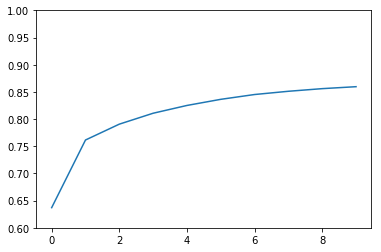

In [81]:
plt.ylim(0.6,1)
plt.plot(acc)

## Training for MNIST

In [43]:
with tf.Session() as sess:
    # Initialize all variables
    sess.run(tf.global_variables_initializer())
    
    # Add the model graph to TensorBoard
    writer.add_graph(sess.graph)
    
    # Loop over number of epochs
    for epoch in range(num_epochs):
        
        start_time = time.time()
        train_accuracy = 0
        
        for batch in range(0, int(len(data.train.labels)/batch_size)):
            
            # Get a batch of images and labels
            x_batch, y_true_batch = data.train.next_batch(batch_size)
            
            # Put the batch into a dict with the proper names for placeholder variables
            feed_dict_train = {x: x_batch, y_true: y_true_batch}
            
            # Run the optimizer using this batch of training data.
            sess.run(optimizer, feed_dict=feed_dict_train)
            
            # Calculate the accuracy on the batch of training data
            train_accuracy += sess.run(accuracy, feed_dict=feed_dict_train)
            
            # Generate summary with the current batch of data and write to file
            summ = sess.run(merged_summary, feed_dict=feed_dict_train)
            writer.add_summary(summ, epoch*int(len(data.train.labels)/batch_size) + batch)
        
          
        train_accuracy /= int(len(data.train.labels)/batch_size)
        
        # Generate summary and validate the model on the entire validation set
        summ, vali_accuracy = sess.run([merged_summary, accuracy], feed_dict={x:data.validation.images, y_true:data.validation.labels})
        writer1.add_summary(summ, epoch)
        

        end_time = time.time()
        
        print("Epoch "+str(epoch+1)+" completed : Time usage "+str(int(end_time-start_time))+" seconds")
        print("\tAccuracy:")
        print ("\t- Training Accuracy:\t{}".format(train_accuracy))
        print ("\t- Validation Accuracy:\t{}".format(vali_accuracy))

Epoch 1 completed : Time usage 72 seconds
	Accuracy:
	- Training Accuracy:	0.7134545448557897
	- Validation Accuracy:	0.879800021648407
Epoch 2 completed : Time usage 83 seconds
	Accuracy:
	- Training Accuracy:	0.8977454559369521
	- Validation Accuracy:	0.9132000207901001
Epoch 3 completed : Time usage 85 seconds
	Accuracy:
	- Training Accuracy:	0.918927274834026
	- Validation Accuracy:	0.9330000281333923
Epoch 4 completed : Time usage 88 seconds
	Accuracy:
	- Training Accuracy:	0.9315272748470307
	- Validation Accuracy:	0.9441999793052673
Epoch 5 completed : Time usage 92 seconds
	Accuracy:
	- Training Accuracy:	0.9427454558285799
	- Validation Accuracy:	0.9535999894142151
Epoch 6 completed : Time usage 106 seconds
	Accuracy:
	- Training Accuracy:	0.9518909122727134
	- Validation Accuracy:	0.9606000185012817
Epoch 7 completed : Time usage 126 seconds
	Accuracy:
	- Training Accuracy:	0.9583272760564631
	- Validation Accuracy:	0.9657999873161316


KeyboardInterrupt: 